<a href="https://colab.research.google.com/github/Danishilyas372/titanic2/blob/main/titanic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


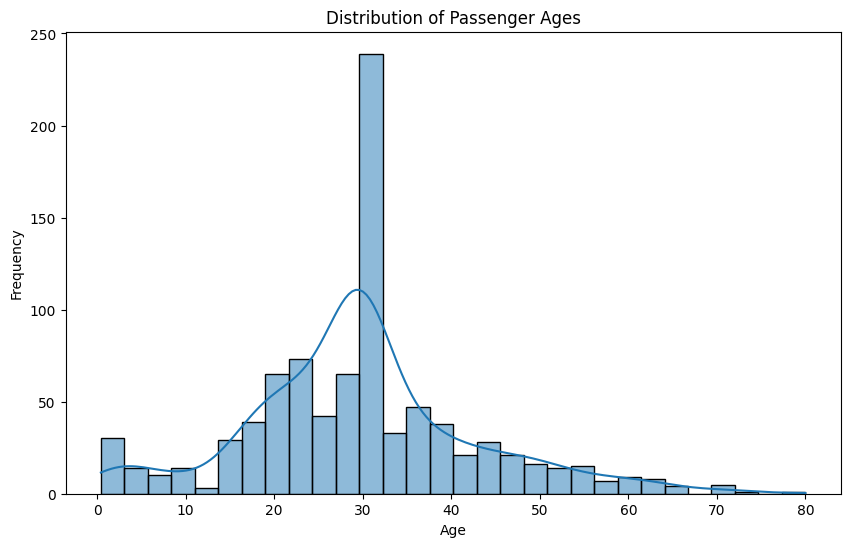

The age distribution of the passengers shows that most passengers were in their 20s and 30s.


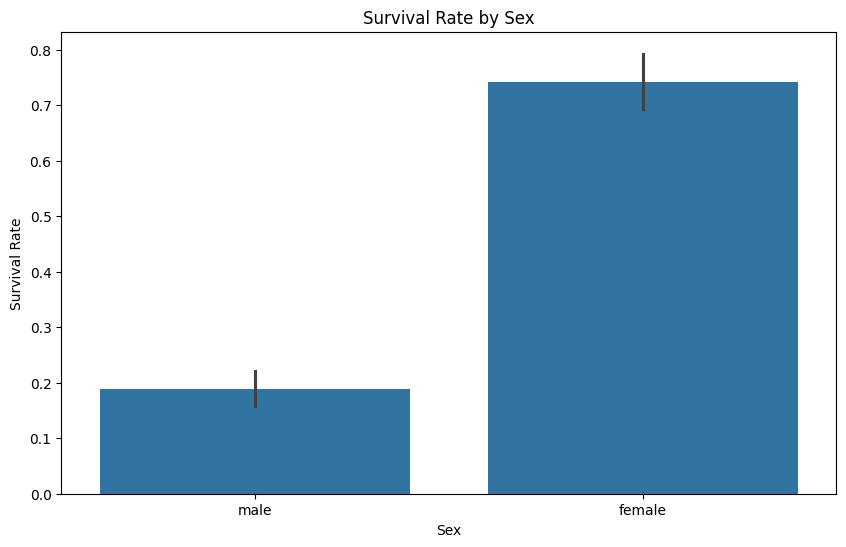

Women had a significantly higher survival rate compared to men.


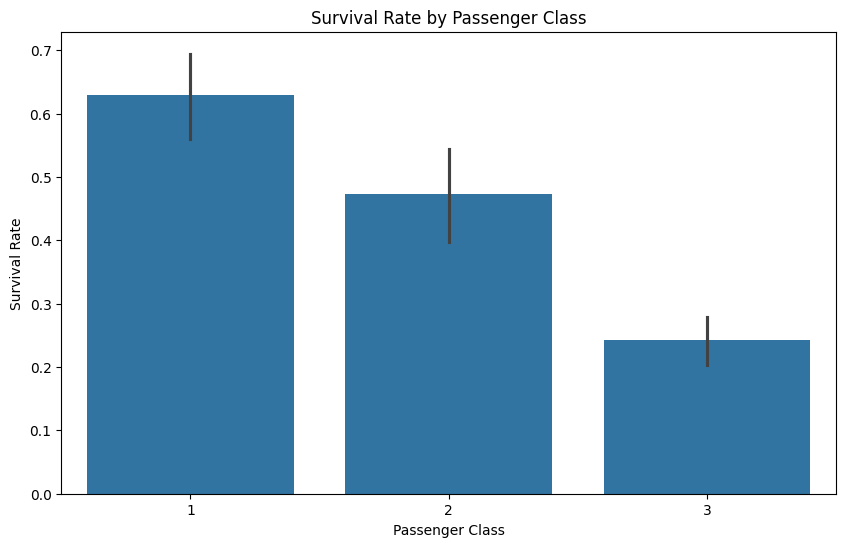

Passengers in higher classes (1st class) had a higher survival rate compared to those in lower classes.


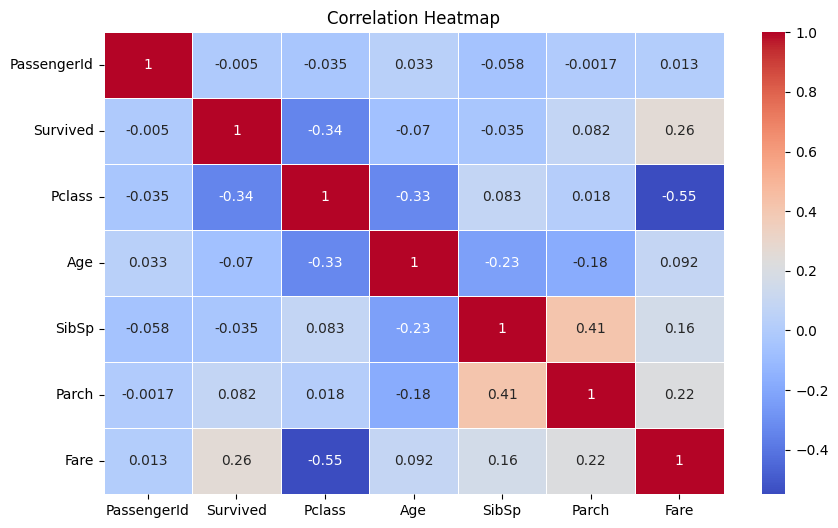

The heatmap shows that 'Fare' and 'Pclass' are significantly correlated with survival rate.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
# Display the first few rows of the dataset
df.head()

# Display information about the dataset
df.info()

# Display statistical summary of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

# Display the column names
df.columns
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
# Fill missing 'Age' values with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing 'Embarked' values with the most common embarkation port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
df.drop(columns='Cabin', inplace=True)

# Verify that there are no more missing values
df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Insight
print("The age distribution of the passengers shows that most passengers were in their 20s and 30s.")
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Insight
print("Women had a significantly higher survival rate compared to men.")
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Insight
print("Passengers in higher classes (1st class) had a higher survival rate compared to those in lower classes.")

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Insight
print("The heatmap shows that 'Fare' and 'Pclass' are significantly correlated with survival rate.")
